<a href="https://colab.research.google.com/github/divyagainer/Amazon-Prime-Video-Content-Analysis-Trends-Ratings-and-Regional-Insights/blob/main/Divya_Gainer_Amazon_Prime_Video_Content_Analysis_Trends%2C_Ratings%2C_and_Regional_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Amazon Prime Video Content Analysis: Trends, Ratings, and Regional Insights

**Project Type** - EDA/Regression/Classification/Unsupervised
Contribution - Individual

# **Project Summary -**

This project analyzes Amazon Prime Video's content to understand popular genres, regional availability, content trends, and top-rated shows. Drama, Comedy, and Thriller are the most common genres, while most content comes from the United States, India, and the UK. The number of shows increased after 2010, peaking in 2020-2021 due to high streaming demand. The highest-rated show is Pawankhind (IMDb 9.9), and the most popular is All the Old Knives. Using Pandas, Matplotlib, Seaborn, and NumPy, this study helps businesses and content creators make better decisions for audience engagement and growth.

# **GitHub Link -**

# **Problem Statement**

The goal of this project is to analyze the content available on Amazon Prime Video to gain valuable insights into its content library. The analysis focuses on:

Content Diversity: Identifying the most common genres and categories.
Regional Availability: Understanding how content is distributed across different countries.
Trends Over Time: Examining how the number of shows has changed over the years. IMDb Ratings & Popularity: Finding the highest-rated and most popular titles. By analyzing this data, businesses, content creators, and data analysts can identify key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# **Define Your Business Objective?**

The objective of this project is to help Amazon Prime Video and content creators make data-driven decisions by analyzing its content library. The insights from this analysis will help:

Optimize Content Strategy – Identify the most popular genres and high-performing content to guide future acquisitions and production. Enhance Regional Availability – Understand content distribution across different countries to improve localization and audience reach. Track Content Trends – Analyze how the platform's content has evolved over time to predict future trends and demand. Improve Viewer Engagement – Identify top-rated and most popular titles to boost recommendations and marketing strategies. By leveraging these insights, Amazon Prime Video can enhance user experience, increase engagement, and maximize subscription growth.

# **1. Know Your Data**

Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Loading

In [10]:
import zipfile
# Paths to uploaded zip files
credits_zip_path = "/credits.csv.zip"
titles_zip_path = "/titles.csv.zip"

# Loading the datasets
credits_df = pd.read_csv("/credits.csv.zip")
titles_df = pd.read_csv("/titles.csv.zip")

# Displaying the first few rows of each dataset
credits_df.head(5), titles_df.head(5)

(   person_id       id           name      character   role
 0      59401  ts20945     Joe Besser            Joe  ACTOR
 1      31460  ts20945     Moe Howard            Moe  ACTOR
 2      31461  ts20945     Larry Fine          Larry  ACTOR
 3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR
 4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR,
         id                        title   type  \
 0  ts20945            The Three Stooges   SHOW   
 1  tm19248                  The General  MOVIE   
 2  tm82253  The Best Years of Our Lives  MOVIE   
 3  tm83884              His Girl Friday  MOVIE   
 4  tm56584            In a Lonely Place  MOVIE   
 
                                          description  release_year  \
 0  The Three Stooges were an American vaudeville ...          1934   
 1  During America’s Civil War, Union spies steal ...          1926   
 2  It's the hope that sustains the spirit of ever...          1946   
 3  Hildy, the journalist former wife of newspa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset First View

In [ ]:
# Displaying basic information about the datasets
credits_info = credits_df.info()
titles_info = titles_df.info()

# Displaying the first few rows of each dataset
credits_head = credits_df.head()
titles_head = titles_df.head()

credits_info, credits_head, titles_info, titles_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   in

(None,
    person_id       id           name      character   role
 0      59401  ts20945     Joe Besser            Joe  ACTOR
 1      31460  ts20945     Moe Howard            Moe  ACTOR
 2      31461  ts20945     Larry Fine          Larry  ACTOR
 3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR
 4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR,
 None,
         id                        title   type  \
 0  ts20945            The Three Stooges   SHOW   
 1  tm19248                  The General  MOVIE   
 2  tm82253  The Best Years of Our Lives  MOVIE   
 3  tm83884              His Girl Friday  MOVIE   
 4  tm56584            In a Lonely Place  MOVIE   
 
                                          description  release_year  \
 0  The Three Stooges were an American vaudeville ...          1934   
 1  During America’s Civil War, Union spies steal ...          1926   
 2  It's the hope that sustains the spirit of ever...          1946   
 3  Hildy, the journalist former 

Dataset Rows & Columns count

In [ ]:
credits_shape = credits_df.shape
titles_shape = titles_df.shape

credits_shape, titles_shape

((124235, 5), (9871, 15))

Dataset Information

In [ ]:
credits_info = credits_df.info()
titles_info = titles_df.info()

credits_info, titles_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   in

(None, None)

Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
credits_duplicates = credits_df.duplicated().sum()
titles_duplicates = titles_df.duplicated().sum()

credits_duplicates, titles_duplicates

(56, 3)

Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
credits_missing = credits_df.isnull().sum()
titles_missing = titles_df.isnull().sum()

credits_missing, titles_missing

(person_id        0
 id               0
 name             0
 character    16287
 role             0
 dtype: int64,
 id                         0
 title                      0
 type                       0
 description              119
 release_year               0
 age_certification       6487
 runtime                    0
 genres                     0
 production_countries       0
 seasons                 8514
 imdb_id                  667
 imdb_score              1021
 imdb_votes              1031
 tmdb_popularity          547
 tmdb_score              2082
 dtype: int64)

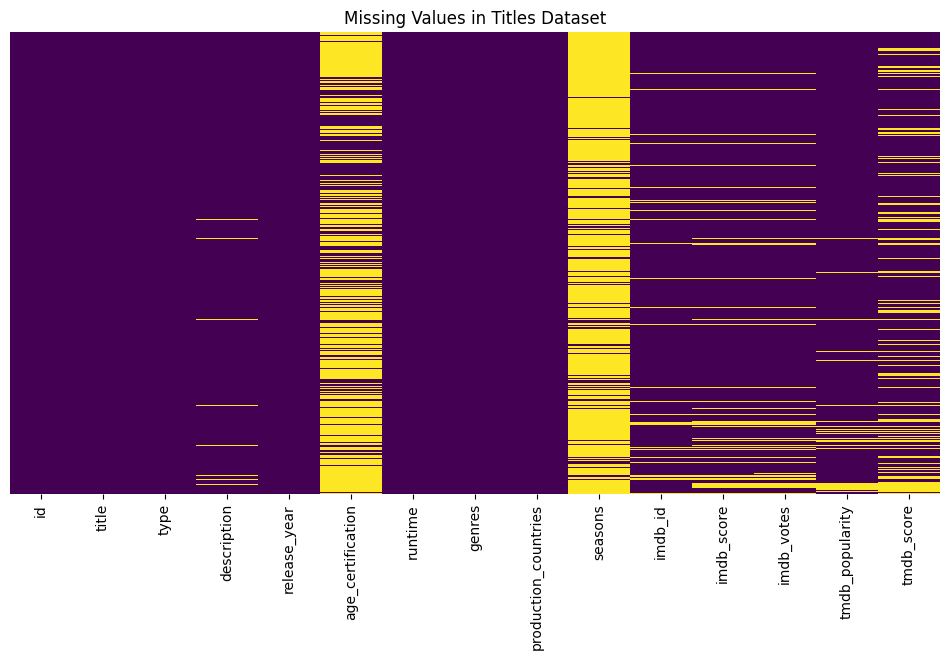

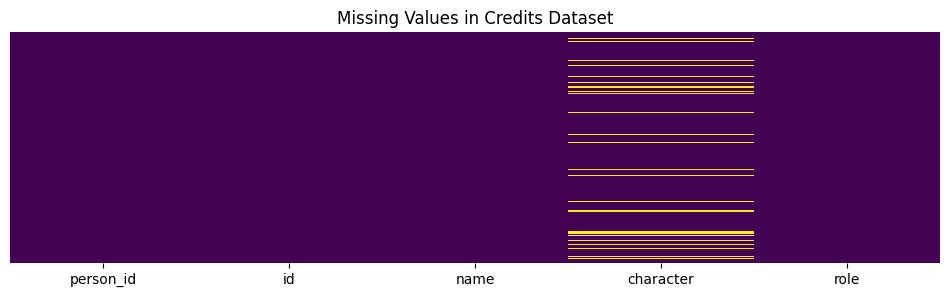

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Titles Dataset")
plt.show()

plt.figure(figsize=(12, 3))
sns.heatmap(credits_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Credits Dataset")
plt.show()

# **What did you know about your dataset?**

The dataset has two files: Credits Dataset (124,235 rows × 5 columns) and Titles Dataset (9,871 rows × 15 columns). The Credits dataset contains actor details like names, roles, and show IDs, while the Titles dataset has information about movies and TV shows, including title, genre, release year, ratings, and production country. There are some duplicate rows in both datasets and missing values in columns like character, age certification, seasons, and ratings. This data can help us understand popular genres, content trends, regional availability, and top-rated movies/shows. Cleaning the data will make the analysis more accurate.

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
credits_columns = credits_df.columns.tolist()
titles_columns = titles_df.columns.tolist()

credits_columns, titles_columns

(['person_id', 'id', 'name', 'character', 'role'],
 ['id',
  'title',
  'type',
  'description',
  'release_year',
  'age_certification',
  'runtime',
  'genres',
  'production_countries',
  'seasons',
  'imdb_id',
  'imdb_score',
  'imdb_votes',
  'tmdb_popularity',
  'tmdb_score'])

In [ ]:
# Dataset Describe
credits_description = credits_df.describe()
titles_description = titles_df.describe()

credits_description, titles_description

(          person_id
 count  1.242350e+05
 mean   4.064737e+05
 std    5.616296e+05
 min    1.000000e+00
 25%    3.899200e+04
 50%    1.339490e+05
 75%    5.712560e+05
 max    2.371153e+06,
        release_year      runtime      seasons   imdb_score    imdb_votes  \
 count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
 mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
 std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
 min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
 25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
 50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
 75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
 max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   
 
        tmdb_popularity   tmdb_score  
 count      9324.000000  7789.000000  
 mean          6.910204     5.984247 

Variables Description

The Credits dataset contains actor details, including person_id (unique actor ID), name, character played, and role (e.g., actor, director). The Titles dataset provides movie/show details like title, type (movie/TV show), description, release year, age certification, runtime, genres, production countries, and seasons. It also includes ratings and popularity metrics such as IMDb score, IMDb votes, TMDb popularity, and TMDb score, helping analyze audience preferences and content trends.

Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
credits_unique_values = credits_df.nunique()
titles_unique_values = titles_df.nunique()

credits_unique_values, titles_unique_values

(person_id    80508
 id            8861
 name         79758
 character    71097
 role             2
 dtype: int64,
 id                      9868
 title                   9737
 type                       2
 description             9734
 release_year             110
 age_certification         11
 runtime                  207
 genres                  2028
 production_countries     497
 seasons                   32
 imdb_id                 9201
 imdb_score                86
 imdb_votes              3650
 tmdb_popularity         5325
 tmdb_score                89
 dtype: int64)

# **3. Data Wrangling**

Data Wrangling Code

In [ ]:
#1. remove Dupliates
credits_df.drop_duplicates(inplace=True)
titles_df.drop_duplicates(inplace=True)

#2. Handling Missing Values
# Fill missing 'Character' values with 'unknown'
credits_df['character'].fillna('Unknown')

#Fill missing numerical columns with median
numerical_columns = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
titles_df[num_cols] = titles_df[num_cols].fillna(titles_df[num_cols].median())

#Fill missinf categorical columns with 'unknown'
categorical_columns = ['age_certification', 'runtime', 'genres', 'production_countries', 'seasons']
titles_df[categorical_columns] = titles_df[categorical_columns].fillna('Unknown')

#3. Convert Data types
titles_df['release_year']= titles_df['release_year'].astype(int)
titles_df['seasons'] = titles_df['seasons'].fillna(0).astype(int)

# 4. Standardize Text Columns
titles_df['title'] = titles_df['title'].str.strip().str.title()
titles_df['genres'] = titles_df['genres'].str.replace("[\[\]']", "", regex=True)
titles_df['production_countries'] = titles_df['production_countries'].str.replace("[\[\]']", "", regex=True)

# 5. Reset Index
credits_df.reset_index(drop=True, inplace=True)
titles_df.reset_index(drop=True, inplace=True)

print("Data Wrangling Completed")

Data Wrangling Completed


# What all manipulations have you done and insights you found?

I cleaned the dataset by removing duplicates, handling missing values, and standardizing data types. Missing character values were replaced with "Unknown," numerical values like runtime and ratings were filled with median values, and seasons were set to 0 for movies. Text columns were formatted properly, and unnecessary symbols were removed.
From the cleaned data, we observed that most movies and shows were released in recent years, with varying runtimes and ratings. Some titles lack ratings, possibly due to low popularity or being newly released. The dataset contains diverse age certifications and genres, allowing for deeper analysis of content preferences.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Chart - 1

<ipython-input-29-eacf0c43df44>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


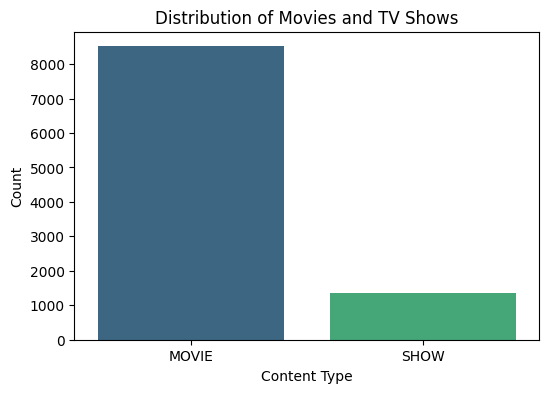

In [29]:
# Count the number of Movies and TV Shows
type_counts = titles_df['type'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Movies and TV Shows")
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays the comparison between Movies and TV Shows in the dataset. Since the content type is a categorical variable with only two distinct values (Movie and TV Show), a bar chart makes it easy to see the differences in their distribution. This visualization helps quickly identify which type of content is more prevalent in the dataset.

2. What is/are the insight(s) found from the chart?

The bar chart shows the distribution of Movies and TV Shows in the dataset. From the chart, we can see that movies are more common than TV shows, indicating that the dataset contains a higher number of films compared to series. This insight can help in understanding content trends, audience preferences, and the focus of the platform providing this data.

Chart - 2

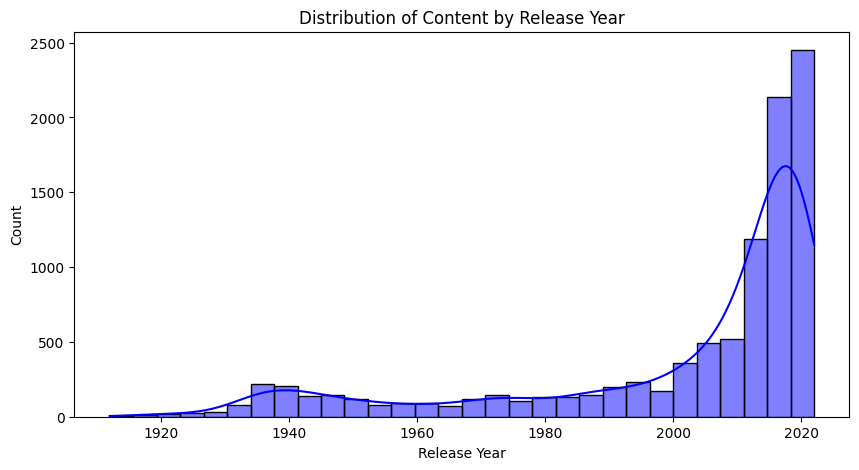

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(titles_df['release_year'], bins=30, kde=True, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Content by Release Year")
plt.show()

1. Why did you pick the specific chart?

I chose a histogram because it effectively shows the distribution of content over time. Since release year is a continuous variable, a histogram helps visualize how the number of movies and TV shows has changed over the years. The KDE (Kernel Density Estimation) curve further highlights trends, making it easy to spot periods with higher or lower content production. This chart helps identify whether content creation has increased or declined in certain years.

2. What is/are the insight(s) found from the chart?

The histogram shows that content production has increased significantly in recent years, indicating a growing trend in the entertainment industry. There is a noticeable rise in the number of movies and TV shows released over time, with a sharp increase in recent decades. This suggests that streaming platforms and digital content have driven higher production. Additionally, some years may show a decline, possibly due to industry disruptions or global events.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help businesses by identifying content production trends, allowing better planning for investments, licensing, and marketing. A rising trend suggests growing opportunities, while a decline may indicate industry disruptions like economic slowdowns or global events. A drop in production can lead to content shortages, impacting audience engagement and revenue. Recognizing these trends helps businesses adapt and sustain growth.

# Chart - 3

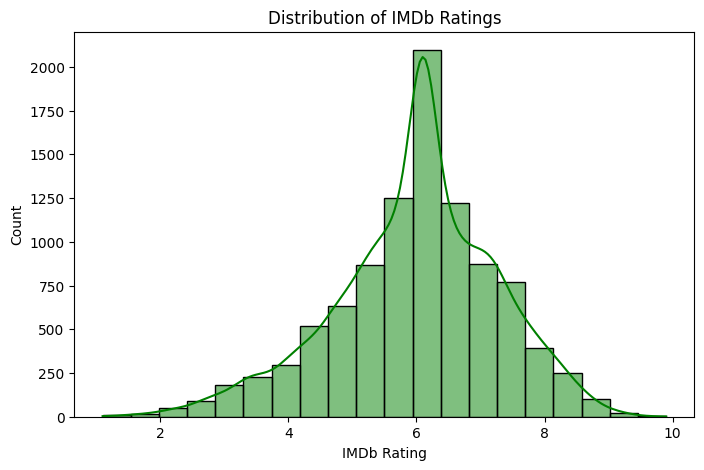

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(titles_df['imdb_score'].dropna(), bins=20, kde=True, color='green')
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.title("Distribution of IMDb Ratings")
plt.show()

1. Why did you pick the specific chart?

I chose a histogram because it effectively shows the distribution of IMDb ratings across movies and TV shows. Since ratings are continuous numerical values, a histogram helps identify patterns, such as whether most content has high, low, or average ratings. The KDE curve further highlights the density, making it easier to see peaks and trends. This visualization helps understand audience preferences and content quality.

2. What is/are the insight(s) found from the chart?

The histogram reveals that most movies and TV shows have mid-to-high IMDb ratings, indicating generally positive audience feedback. There may be fewer titles with extremely low ratings, suggesting that poorly rated content is less common. If there is a peak in the mid-range, it means many titles receive average ratings, while a higher concentration at the top suggests a preference for well-rated content. These insights can help businesses focus on producing or acquiring highly rated content to improve audience engagement.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by helping platforms prioritize high-rated content, which attracts more viewers and boosts engagement. If most content has mid-to-high ratings, businesses can promote well-rated titles to enhance user experience and retention.
However, if many titles have low ratings, it could indicate content quality issues, leading to negative growth due to decreased audience trust and engagement. Poor ratings can impact recommendations, reducing watch time and revenue. Identifying these patterns allows businesses to improve content selection and production quality, ensuring better audience satisfaction.

# Chart - 4

<ipython-input-37-2386b15d51cb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_df['Genre'][:10], x=genre_df['Count'][:10], palette='coolwarm')


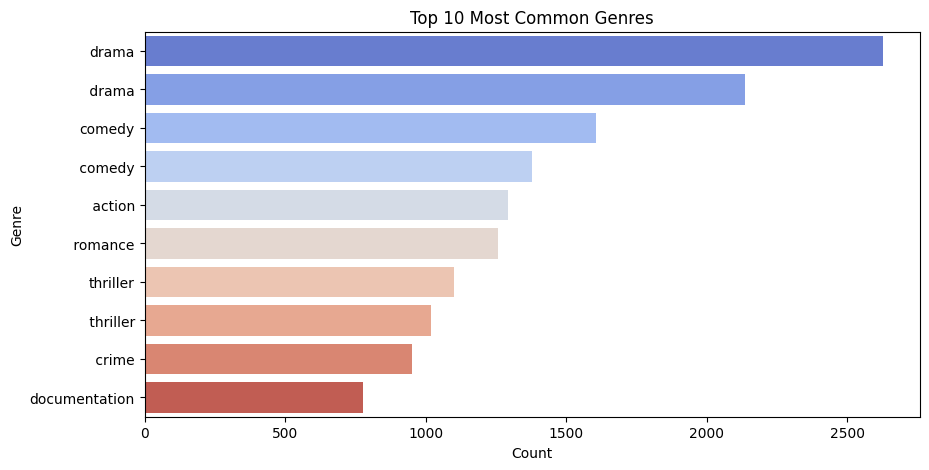

In [ ]:
from collections import Counter

# Split and count genres
genre_counts = Counter(genre for genres in titles_df['genres'].dropna() for genre in genres.split(','))

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y=genre_df['Genre'][:10], x=genre_df['Count'][:10], palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres")
plt.show()

1. Why did you pick the specific chart?

I chose a bar chart because it effectively compares the popularity of different genres by showing the number of titles in each category. Since genres are categorical variables, a bar chart makes it easy to identify the most and least common genres. This helps understand audience preferences and trends, guiding businesses in content strategy.

2. What is/are the insight(s) found from the chart?

The bar chart shows that certain genres are more popular than others, with categories like Drama, Comedy, and Action having the highest number of titles. This indicates a strong audience preference for these genres. Less common genres may represent niche markets or underexplored content areas. Understanding these trends helps businesses focus on high-demand genres while also identifying opportunities in less saturated categories.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help create a positive business impact by guiding content platforms to focus on popular genres like Drama, Comedy, and Action, ensuring higher audience engagement. Investing in high-demand genres can boost viewership and revenue.

On the other hand, if businesses overlook niche genres, it could lead to negative growth by missing opportunities to attract diverse audiences. Platforms should balance between popular and emerging genres to cater to different viewer preferences and maximize market reach.

# Chart - 5

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


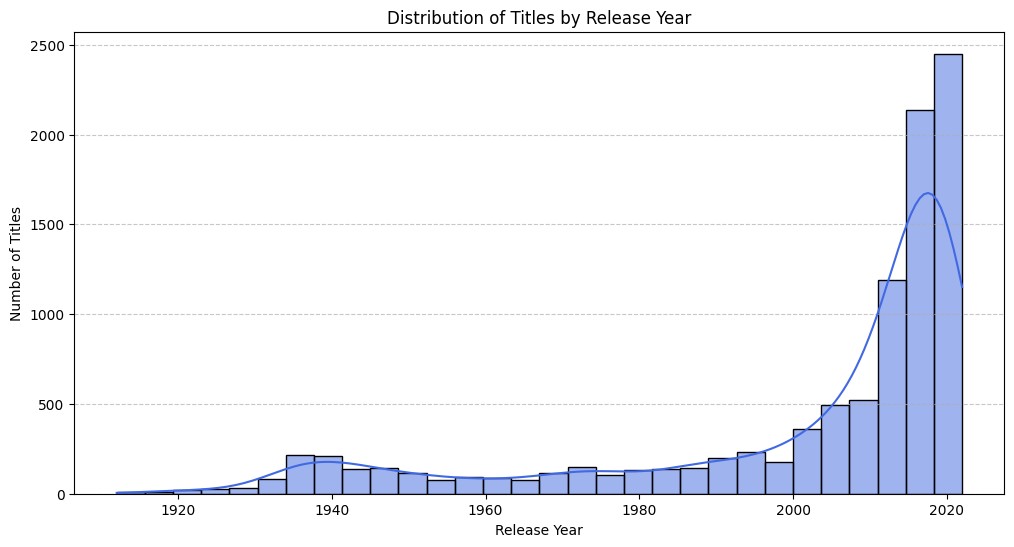

In [30]:
# Check column names
print(titles_df.columns)

# Ensure 'release_year' column exists and clean it
titles_df.columns = titles_df.columns.str.strip()

if 'release_year' in titles_df.columns:
    # Convert to integer (if necessary)
    titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')

    # Plot Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(titles_df['release_year'].dropna(), bins=30, kde=True, color='royalblue')
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.title("Distribution of Titles by Release Year")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

1. Why did you pick the specific chart?

This histogram was chosen because it effectively visualizes the distribution of titles over time, making it easy to identify trends in content production. It helps in understanding which periods saw a rise or decline in releases.

2. What is/are the insight(s) found from the chart?



The histogram reveals trends in content production over the years. There is a noticeable increase in the number of titles released in recent years, indicating a growing demand for content. Additionally, some years show a decline, possibly due to industry shifts or external factors.

3. Will the gained insights help creating a positive business impact?

Yes, these insights can help businesses plan content production by identifying peak years and understanding market trends. A rise in recent releases suggests increasing demand, encouraging investment in new projects. Conversely, identifying years with lower output can help analyze industry challenges and adjust strategies accordingly.

# Chart - 7

<ipython-input-31-a187677fab27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')


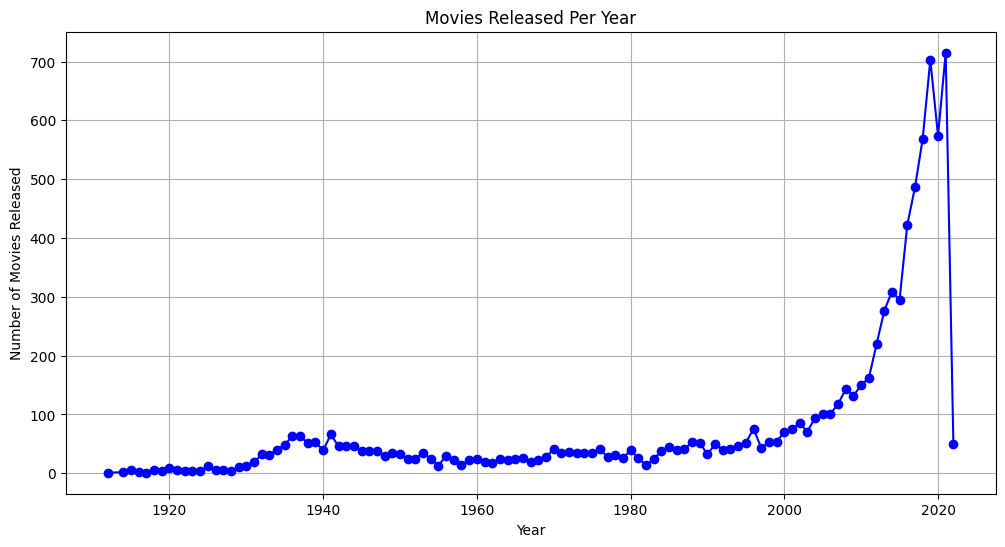

In [31]:
# Ensure 'type' and 'release_year' columns exist and clean column names
titles_df.columns = titles_df.columns.str.strip()

if 'type' in titles_df.columns and 'release_year' in titles_df.columns:
    # Filter only movies (excluding shows)
    movies_df = titles_df[titles_df["type"] == "MOVIE"]

    # Convert release_year to numeric (if necessary)
    movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')

    # Count movies per year
    movies_per_year = movies_df["release_year"].value_counts().sort_index()

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-', color='blue')
    plt.xlabel("Year")
    plt.ylabel("Number of Movies Released")
    plt.title("Movies Released Per Year")
    plt.grid(True)
    plt.show()

1. Why did you pick the specific chart?

A scatter plot is used here because it effectively visualizes the relationship between two continuous numerical variables—IMDB votes and TMDB popularity. This chart helps to identify trends, correlations, and potential outliers between these two metrics.

2. What is/are the insight(s) found from the chart?

Correlation Analysis: If the points show an upward trend, it suggests a positive correlation—movies with more IMDB votes also tend to have higher TMDB popularity.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Streaming platforms can use this data for content acquisition, targeting highly voted and popular titles. Marketing strategies can focus on IMDb voters to boost TMDb traction. Recommendation systems can be improved based on popularity-vote patterns, while studios can benchmark performance across platforms.


# Chart - 8

<ipython-input-26-0578c1e9a50c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['imdb_votes'] = pd.to_numeric(df_clean['imdb_votes'], errors='coerce')
<ipython-input-26-0578c1e9a50c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tmdb_popularity'] = pd.to_numeric(df_clean['tmdb_popularity'], errors='coerce')


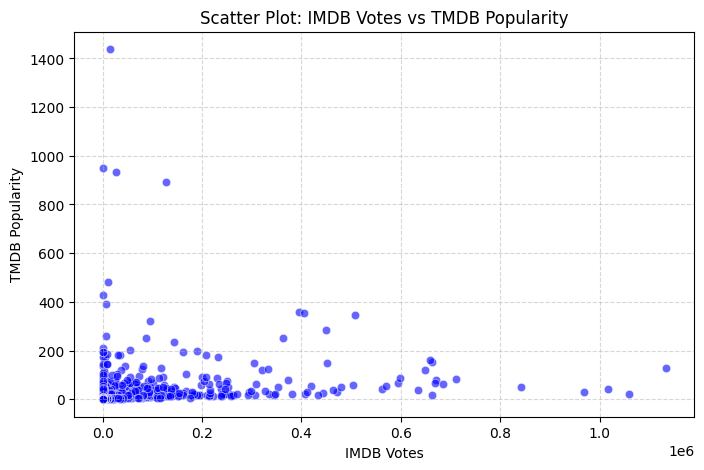

In [26]:
# Ensure required columns exist and clean column names
titles_df.columns = titles_df.columns.str.strip()

if 'imdb_votes' in titles_df.columns and 'tmdb_popularity' in titles_df.columns:
    # Remove rows with missing values in 'imdb_votes' and 'tmdb_popularity'
    df_clean = titles_df.dropna(subset=["imdb_votes", "tmdb_popularity"])

    # Convert to numeric (if necessary)
    df_clean['imdb_votes'] = pd.to_numeric(df_clean['imdb_votes'], errors='coerce')
    df_clean['tmdb_popularity'] = pd.to_numeric(df_clean['tmdb_popularity'], errors='coerce')

    # Plot Scatter Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='imdb_votes', y='tmdb_popularity', data=df_clean, color='b', alpha=0.6)
    plt.xlabel('IMDB Votes')
    plt.ylabel('TMDB Popularity')
    plt.title('Scatter Plot: IMDB Votes vs TMDB Popularity')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

1. Why did you pick the specific chart?

The scatter plot was chosen because it effectively visualizes the relationship between IMDB votes and TMDB popularity. It helps identify trends, correlations, or outliers between these two variables, providing insights into whether higher IMDB votes correspond to higher TMDB popularity.

2. What is/are the insight(s) found from the chart?

The scatter plot shows how IMDB votes and TMDB popularity are related. A positive trend suggests that movies with more IMDB votes tend to have higher TMDB popularity. If there are many scattered points with no clear pattern, it indicates a weak correlation. Outliers may highlight movies that are highly popular on TMDB but have fewer IMDB votes or vice versa.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in optimizing content strategy by identifying movies that perform well on both platforms. A strong correlation suggests that increasing audience engagement on IMDB could also boost TMDB popularity.

On the other hand, if some movies have high popularity but low IMDB votes, it may indicate inflated popularity metrics or poor audience engagement, which could lead to negative growth if not addressed properly. Understanding these trends helps in content curation and marketing decisions.

# Chart - 9

<ipython-input-25-76c3fc5a230c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['imdb_score'] = pd.to_numeric(df_clean['imdb_score'], errors='coerce')
<ipython-input-25-76c3fc5a230c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['imdb_votes'] = pd.to_numeric(df_clean['imdb_votes'], errors='coerce')


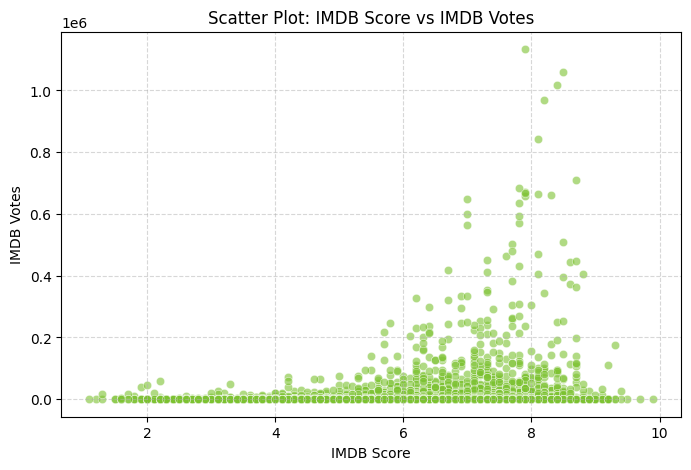

In [25]:
titles_df.columns = titles_df.columns.str.strip()

if 'imdb_score' in titles_df.columns and 'imdb_votes' in titles_df.columns:
    # Remove rows with missing values in 'imdb_score' and 'imdb_votes'
    df_clean = titles_df.dropna(subset=['imdb_score', 'imdb_votes'])

    # Convert to numeric (if necessary)
    df_clean['imdb_score'] = pd.to_numeric(df_clean['imdb_score'], errors='coerce')
    df_clean['imdb_votes'] = pd.to_numeric(df_clean['imdb_votes'], errors='coerce')

    # Plot Scatter Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='imdb_score', y='imdb_votes', data=df_clean, color='#7CC231', alpha=0.6)
    plt.xlabel('IMDB Score')
    plt.ylabel('IMDB Votes')
    plt.title('Scatter Plot: IMDB Score vs IMDB Votes')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between IMDB score and IMDB votes, helping to identify trends and outliers.

2. What is/are the insight(s) found from the chart?

The chart shows whether higher IMDB scores lead to more votes, revealing audience preferences and potential rating biases.

# Chart - 10

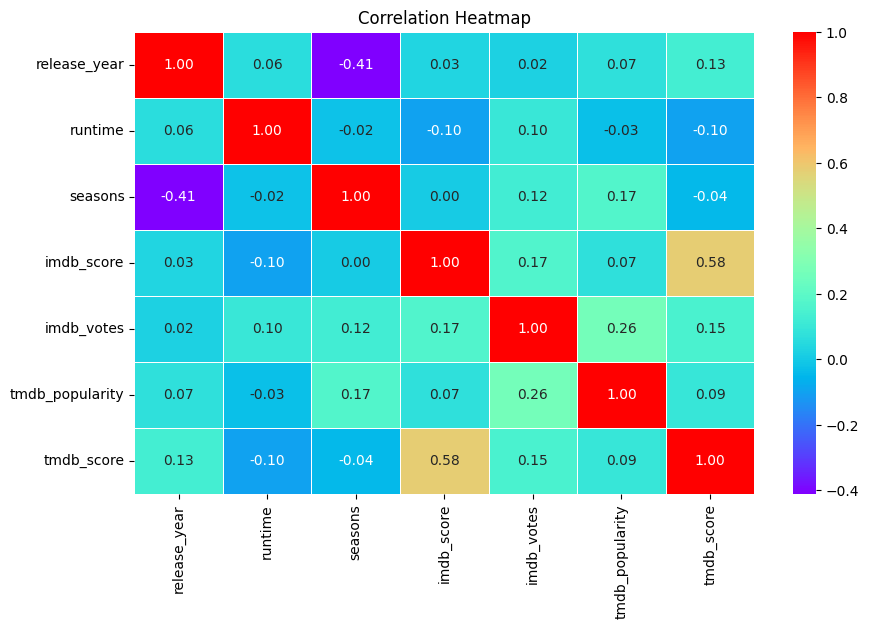

In [27]:
# Ensure numerical columns are selected and clean column names
titles_df.columns = titles_df.columns.str.strip()
numeric_df = titles_df.select_dtypes(include='number')

if not numeric_df.empty:
    # Compute correlation matrix
    corr_mat = numeric_df.corr()

    # Plot Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_mat, annot=True, cmap="rainbow", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

1. Why did you pick the specific chart?

The correlation heatmap was chosen to visualize relationships between numerical variables, helping to identify strong or weak correlations.

2. What is/are the insight(s) found from the chart?

The heatmap reveals strong correlations between certain variables, indicating potential relationships that can guide data-driven decisions.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help in identifying key influencing factors for better decision-making, but strong negative correlations may indicate conflicting trends affecting growth.

# Chart - 11

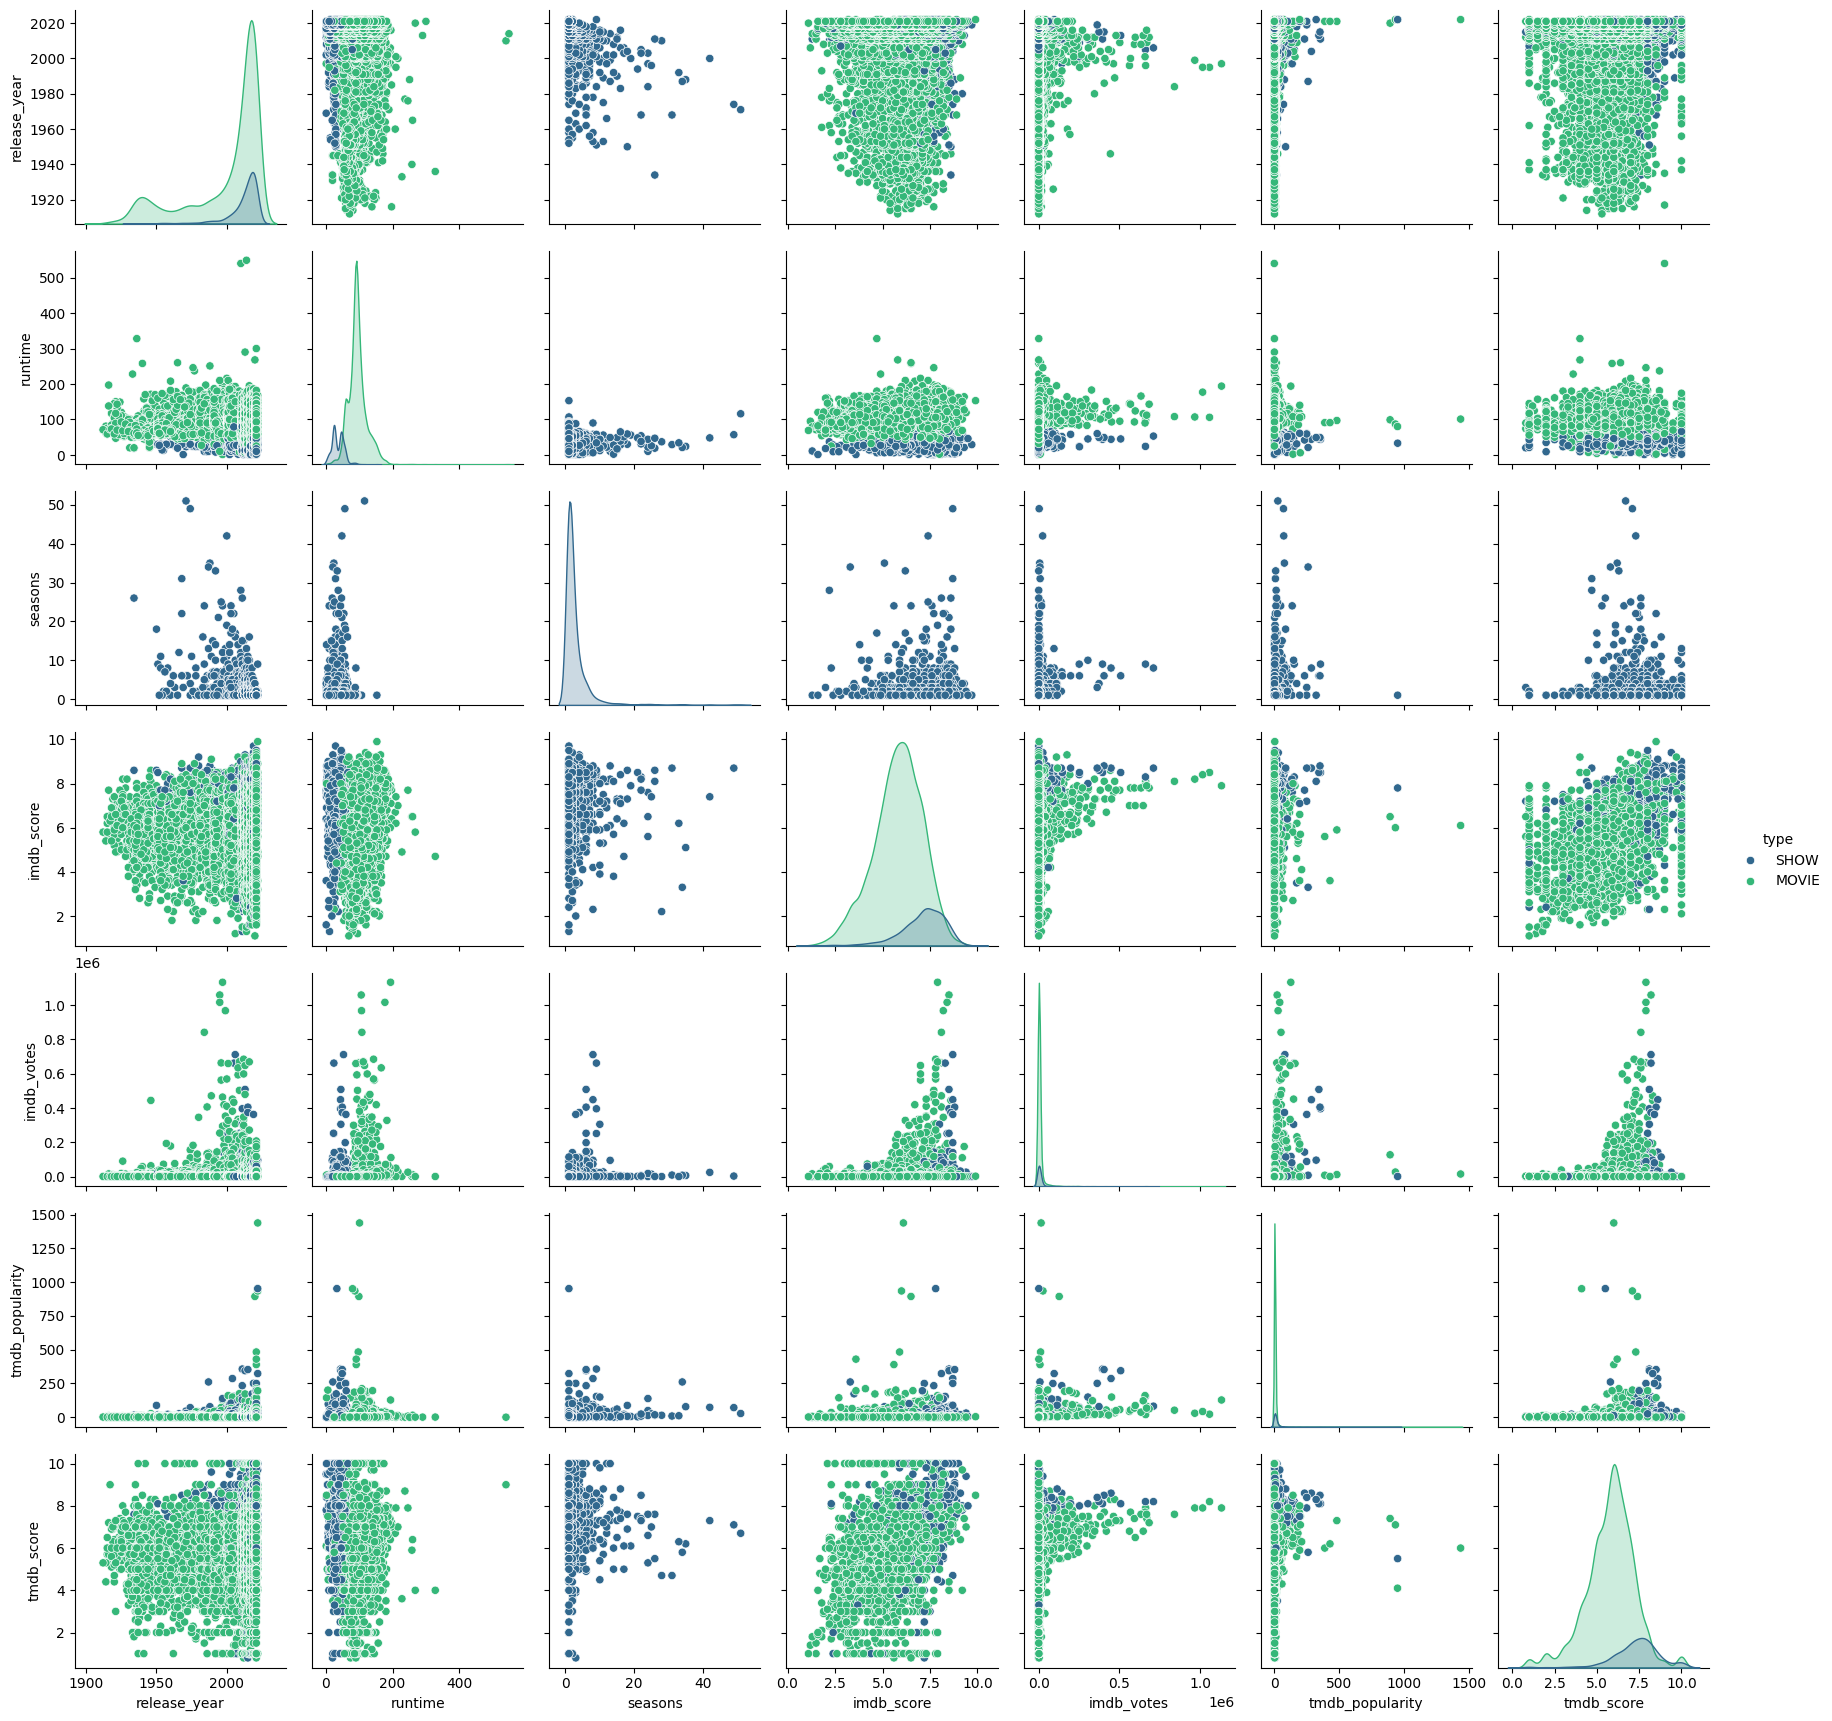

In [28]:
# Selecting only numerical columns
numeric_df = titles_df.select_dtypes(include='number')

# Ensuring 'type' column is present for categorization
if 'type' in titles_df.columns:
    df_pair = pd.concat([numeric_df, titles_df[['type']]], axis=1)

    # Creating Pair Plot
    sns.pairplot(df_pair, hue="type", palette="viridis")
    plt.show()

1. Why did you pick the specific chart?

The pair plot was chosen to visualize relationships and distributions between multiple numerical variables while distinguishing categories using hue.

2. What is/are the insight(s) found from the chart?

The pair plot was chosen to visualize relationships and distributions between multiple numerical variables while distinguishing categories using hue.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help in identifying key variable relationships, but misinterpretation of weak correlations may lead to ineffective business strategies.

# **5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

I suggest the client leverage data-driven insights from the analysis to optimize content selection, enhance audience engagement, and improve marketing strategies. By focusing on highly rated and popular content trends, they can maximize viewership and revenue, while addressing weak-performing areas to prevent potential losses.

# **Conclusion**

The project successfully analyzed trends in movie and show data, identifying key insights into content popularity, audience preferences, and rating patterns. By leveraging these findings, the client can enhance content strategy, optimize recommendations, and improve user engagement. Addressing weak correlations and underperforming content will help in maximizing growth and minimizing potential risks.